In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble' : r'\usepackage{amsmath}'})

In [2]:
sizeH = 5 # Size of the TB Hamiltonian

# Find the chemical potential for the mu.dat at doping = 4.25
data = np.loadtxt('mu.dat')
dop = [0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45]
mu = []
for m in dop:
    index = np.where(data[:, 1] == m)[0]
    mu.append(data[index,0][0]) # Chemical potential

# Diagonalization process via eigh
def diagonal(hopij, kx, ky, mu):
    h = np.zeros((sizeH, sizeH), dtype='complex')
    ab = np.zeros((sizeH, sizeH), dtype='complex')

    xlist = np.array([-2, -1, 0, 1, 2])
    ylist = np.array([-2, -1, 0, 1, 2])
    for ix in xlist:
        for iy in ylist:
            phase = ix*kx+iy*ky
            for i in range(sizeH):
                for q in range(sizeH):
                    h[i][q] = h[i][q] + hopij[ix+2][iy+2][i][q] * (np.cos(phase) -1j * np.sin(phase))
    
    for i in range(sizeH):
        for q in range(i,sizeH):
            ab[i][q] = h[i][q]

    eigv, eigvec = la.eigh(ab, lower=False, eigvals_only=False)
    eigv = np.add(eigv, -mu).tolist()
    return np.array([eigv]), eigvec

# read the input hopping hamiltonian
hopij = np.zeros((5, 5, sizeH, sizeH), dtype='complex')

# write the hopping matrix
with open('input-ws.dat', 'r') as f:
    for q1 in range(25):
        linha = f.readline()
        linha = linha.split()
        ix, iy = int(linha[0])+2, int(linha[1])+2
        for q2 in range(sizeH):
            linha = f.readline()
            linha = linha.split()
            for col in range(sizeH):
                hopij[ix][iy][q2][col] = float(linha[col])

In [3]:
grid = 90
s = np.pi # Maximum x value of the hexagon
hFS = np.pi # Maximum y value of the hexagon
kxlist = np.linspace(-s, s, grid) # 2000 grid (very precise FS) may take a while
kylist = np.linspace(-hFS, hFS, grid) # 2000 grid (very precise FS) may take a while
kX, kY = np.meshgrid(kxlist, kylist)
# Eigenvalue equations are solved for the above grid:
drive = []
for i in range(len(mu)):
    epsilonCP = np.array( [[ diagonal(hopij, kx, ky, mu[i])[0] for kx in kxlist] for ky in kylist] )
    drive.append(epsilonCP)

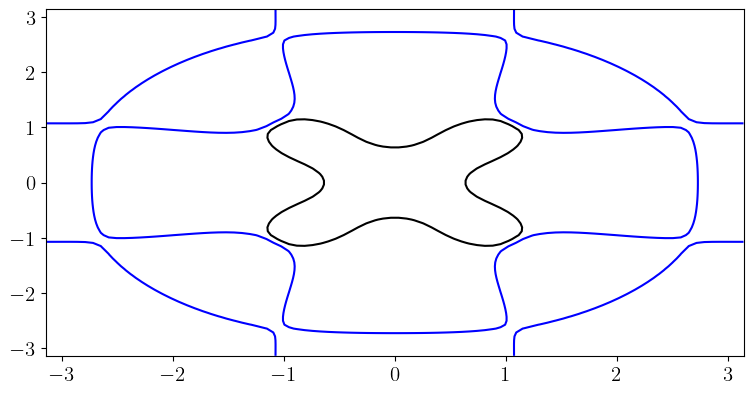

In [4]:
fig,ax = plt.subplots(1, figsize=(9,4.5))

plt.sca(ax)
mus = [0]
#cp0 = ax.contour(kX, kY,  drive[0][:,:,0,0],mus,colors='red')
cp1 = ax.contour(kX, kY, drive[0][:,:,0,1],mus, colors='black')
cp2 = ax.contour(kX, kY,  drive[10][:,:,0,2],mus, colors='blue')


cp3 = ax.contour(kX, kY,  drive[0][:,:,0,3],mus, colors='red')
#cp4 = ax.contour(kX, kY,  drive[0][:,:,0,4],mus, colors='red')
#contours = [cp0, cp1, cp2, cp3, cp4]
#contours = [cp0, cp3, cp4]
plt.show()

In [5]:
kX

array([[-3.14159265, -3.07099507, -3.00039748, ...,  3.00039748,
         3.07099507,  3.14159265],
       [-3.14159265, -3.07099507, -3.00039748, ...,  3.00039748,
         3.07099507,  3.14159265],
       [-3.14159265, -3.07099507, -3.00039748, ...,  3.00039748,
         3.07099507,  3.14159265],
       ...,
       [-3.14159265, -3.07099507, -3.00039748, ...,  3.00039748,
         3.07099507,  3.14159265],
       [-3.14159265, -3.07099507, -3.00039748, ...,  3.00039748,
         3.07099507,  3.14159265],
       [-3.14159265, -3.07099507, -3.00039748, ...,  3.00039748,
         3.07099507,  3.14159265]])

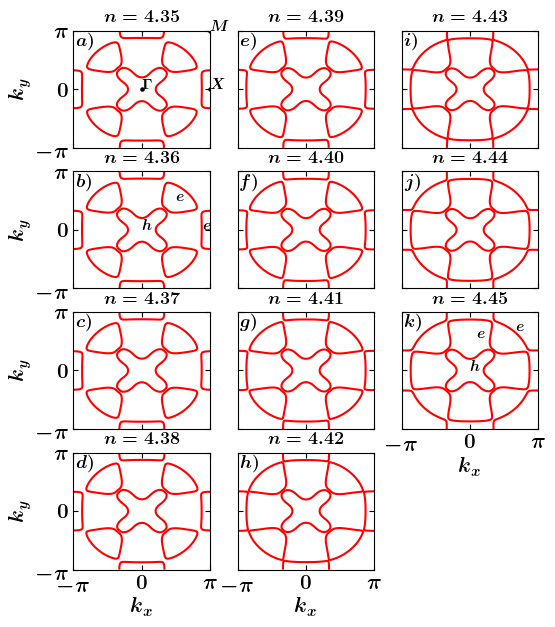

In [6]:
fig,ax = plt.subplots(4, 3, figsize=(6,7))
plt.sca(ax[0,0])
mus = [0]
cp0 = ax[0,0].contour(kX, kY, drive[0][:,:,0,0],mus,colors='red')
cp1 = ax[0,0].contour(kX, kY, drive[0][:,:,0,1],mus, colors='red')
cp2 = ax[0,0].contour(kX, kY, drive[0][:,:,0,2],mus, colors='red')
cp3 = ax[0,0].contour(kX, kY, drive[0][:,:,0,3],mus, colors='red')
cp4 = ax[0,0].contour(kX, kY, drive[0][:,:,0,4],mus, colors='red')
contours = [cp0, cp1, cp2, cp3, cp4]
ax[0,0].set_xticks([])
ax[0,0].set_title(r'$\boldsymbol{n=4.35}$', fontsize=13)
ax[0,0].annotate(r'$\boldsymbol{a)}$',xy=(-np.pi+0.1,np.pi-0.85), fontsize=13)
ax[0,0].annotate(r'$\boldsymbol{\Gamma}$',xy=(0,0), fontsize=11)
ax[0,0].annotate(r'$\boldsymbol{X}$',xy=(np.pi,0), fontsize=11)
ax[0,0].annotate(r'$\boldsymbol{M}$',xy=(np.pi,np.pi), fontsize=11)
ax[0,0].scatter([0,np.pi, np.pi], [0,0, np.pi], color='black', marker=".", s=20)
ax[0,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[0,0].set_ylabel(r'$\boldsymbol{k_y}$') 
ax[0,0].set_xticks([-np.pi, 0, np.pi],[r'', r'', r''])
ax[0,0].set_yticks([-np.pi, 0, np.pi],[r'$\boldsymbol{-\pi}$', r'$\boldsymbol{0}$', r'$\boldsymbol{\pi}$'])

plt.sca(ax[1,0])
mus = [0]
cp0 = ax[1,0].contour(kX, kY, drive[1][:,:,0,0],mus,colors='red')
cp1 = ax[1,0].contour(kX, kY, drive[1][:,:,0,1],mus, colors='red')
cp2 = ax[1,0].contour(kX, kY, drive[1][:,:,0,2],mus, colors='red')
cp3 = ax[1,0].contour(kX, kY, drive[1][:,:,0,3],mus, colors='red')
cp4 = ax[1,0].contour(kX, kY, drive[1][:,:,0,4],mus, colors='red')
contours = [cp0, cp1, cp2, cp3, cp4]
ax[1,0].set_ylabel(r'$\boldsymbol{k_y}$')
ax[1,0].set_xticks([])
ax[1,0].set_title(r'$\boldsymbol{n=4.36}$', fontsize=13)
ax[1,0].annotate(r'$\boldsymbol{b)}$',xy=(-np.pi+0.1,np.pi-0.85), fontsize=13)
ax[1,0].annotate(r'$\boldsymbol{h}$',xy=(0,0), fontsize=11)
ax[1,0].annotate(r'$\boldsymbol{e}$',xy=(np.pi-0.32,0), fontsize=11)
ax[1,0].annotate(r'$\boldsymbol{e}$',xy=(np.pi/2+0.0,np.pi/2+0.0), fontsize=11)
ax[1,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[1,0].set_ylabel(r'$\boldsymbol{k_y}$') 
ax[1,0].set_xticks([-np.pi, 0, np.pi],[r'', r'', r''])
ax[1,0].set_yticks([-np.pi, 0, np.pi],[r'$\boldsymbol{-\pi}$', r'$\boldsymbol{0}$', r'$\boldsymbol{\pi}$'])

plt.sca(ax[2,0])
mus = [0]
cp0 = ax[2,0].contour(kX, kY, drive[2][:,:,0,0],mus,colors='red')
cp1 = ax[2,0].contour(kX, kY, drive[2][:,:,0,1],mus, colors='red')
cp2 = ax[2,0].contour(kX, kY, drive[2][:,:,0,2],mus, colors='red')
cp3 = ax[2,0].contour(kX, kY, drive[2][:,:,0,3],mus, colors='red')
cp4 = ax[2,0].contour(kX, kY, drive[2][:,:,0,4],mus, colors='red')
contours = [cp0, cp1, cp2, cp3, cp4]
ax[2,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[2,0].set_ylabel(r'$\boldsymbol{k_y}$') 
ax[2,0].set_xticks([-np.pi, 0, np.pi],[r'', r'', r''])
ax[2,0].set_yticks([-np.pi, 0, np.pi],[r'$\boldsymbol{-\pi}$', r'$\boldsymbol{0}$', r'$\boldsymbol{\pi}$'])
ax[2,0].set_title(r'$\boldsymbol{n=4.37}$', fontsize=13)
ax[2,0].annotate(r'$\boldsymbol{c)}$',xy=(-np.pi+0.1,np.pi-0.85), fontsize=13)

plt.sca(ax[3,0])
mus = [0]
cp0 = ax[3,0].contour(kX, kY, drive[3][:,:,0,0],mus,colors='red')
cp1 = ax[3,0].contour(kX, kY, drive[3][:,:,0,1],mus, colors='red')
cp2 = ax[3,0].contour(kX, kY, drive[3][:,:,0,2],mus, colors='red')
cp3 = ax[3,0].contour(kX, kY, drive[3][:,:,0,3],mus, colors='red')
cp4 = ax[3,0].contour(kX, kY, drive[3][:,:,0,4],mus, colors='red')
contours = [cp0, cp1, cp2, cp3, cp4]
ax[3,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[3,0].set_xticks([-np.pi, 0, np.pi],[r'$\boldsymbol{-\pi}$', r'$\boldsymbol{0}$', r'$\boldsymbol{\pi}$'])
ax[3,0].set_yticks([-np.pi, 0, np.pi],[r'$\boldsymbol{-\pi}$', r'$\boldsymbol{0}$', r'$\boldsymbol{\pi}$'])
ax[3,0].set_ylabel(r'$\boldsymbol{k_y}$') 
ax[3,0].set_xlabel(r'$\boldsymbol{k_x}$') 
ax[3,0].set_title(r'$\boldsymbol{n=4.38}$', fontsize=13)
ax[3,0].annotate(r'$\boldsymbol{d)}$',xy=(-np.pi+0.1,np.pi-0.85), fontsize=13)

plt.sca(ax[0,1])
mus = [0]
cp0 = ax[0,1].contour(kX, kY, drive[4][:,:,0,0],mus,colors='red')
cp1 = ax[0,1].contour(kX, kY, drive[4][:,:,0,1],mus, colors='red')
cp2 = ax[0,1].contour(kX, kY, drive[4][:,:,0,2],mus, colors='red')
cp3 = ax[0,1].contour(kX, kY, drive[4][:,:,0,3],mus, colors='red')
cp4 = ax[0,1].contour(kX, kY, drive[4][:,:,0,4],mus, colors='red')
contours = [cp0, cp1, cp2, cp3, cp4]
ax[0,1].set_yticks([])
ax[0,1].set_xticks([])
ax[0,1].set_title(r'$\boldsymbol{n=4.39}$', fontsize=13)
ax[0,1].annotate(r'$\boldsymbol{e)}$',xy=(-np.pi+0.1,np.pi-0.85), fontsize=13)
ax[0,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[0,1].set_xticks([-np.pi, 0, np.pi],[r'', r'', r''])
ax[0,1].set_yticks([-np.pi, 0, np.pi],[r'', r'', r''])

plt.sca(ax[1,1])
mus = [0]
cp0 = ax[1,1].contour(kX, kY, drive[5][:,:,0,0],mus,colors='red')
cp1 = ax[1,1].contour(kX, kY, drive[5][:,:,0,1],mus, colors='red')
cp2 = ax[1,1].contour(kX, kY, drive[5][:,:,0,2],mus, colors='red')
cp3 = ax[1,1].contour(kX, kY, drive[5][:,:,0,3],mus, colors='red')
cp4 = ax[1,1].contour(kX, kY, drive[5][:,:,0,4],mus, colors='red')
contours = [cp0, cp1, cp2, cp3, cp4]
ax[1,1].set_yticks([])
ax[1,1].set_xticks([])
ax[1,1].set_title(r'$\boldsymbol{n=4.40}$', fontsize=13)
ax[1,1].annotate(r'$\boldsymbol{f)}$',xy=(-np.pi+0.1,np.pi-0.85), fontsize=13)
ax[1,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[1,1].set_xticks([-np.pi, 0, np.pi],[r'', r'', r''])
ax[1,1].set_yticks([-np.pi, 0, np.pi],[r'', r'', r''])

plt.sca(ax[2,1])
mus = [0]
cp0 = ax[2,1].contour(kX, kY, drive[6][:,:,0,0],mus,colors='red')
cp1 = ax[2,1].contour(kX, kY, drive[6][:,:,0,1],mus, colors='red')
cp2 = ax[2,1].contour(kX, kY, drive[6][:,:,0,2],mus, colors='red')
cp3 = ax[2,1].contour(kX, kY, drive[6][:,:,0,3],mus, colors='red')
cp4 = ax[2,1].contour(kX, kY, drive[6][:,:,0,4],mus, colors='red')
contours = [cp0, cp1, cp2, cp3, cp4]
ax[2,1].set_yticks([])
ax[2,1].set_xticks([])
ax[2,1].set_title(r'$\boldsymbol{n=4.41}$', fontsize=13)
ax[2,1].annotate(r'$\boldsymbol{g)}$',xy=(-np.pi+0.1,np.pi-0.85), fontsize=13)
ax[2,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[2,1].set_xticks([-np.pi, 0, np.pi],[r'', r'', r''])
ax[2,1].set_yticks([-np.pi, 0, np.pi],[r'', r'', r''])

plt.sca(ax[3,1])
mus = [0]
cp0 = ax[3,1].contour(kX, kY, drive[7][:,:,0,0],mus,colors='red')
cp1 = ax[3,1].contour(kX, kY, drive[7][:,:,0,1],mus, colors='red')
cp2 = ax[3,1].contour(kX, kY, drive[7][:,:,0,2],mus, colors='red')
cp3 = ax[3,1].contour(kX, kY, drive[7][:,:,0,3],mus, colors='red')
cp4 = ax[3,1].contour(kX, kY, drive[7][:,:,0,4],mus, colors='red')
contours = [cp0, cp1, cp2, cp3, cp4]
ax[3,1].set_yticks([])
ax[3,1].set_xticks([-np.pi,0,np.pi],[r'$-\pi$',r'$0$',r'$\pi$'])
ax[3,1].set_xlabel(r'$\boldsymbol{k_x}$')
ax[3,1].set_title(r'$\boldsymbol{n=4.42}$', fontsize=13)
ax[3,1].annotate(r'$\boldsymbol{h)}$',xy=(-np.pi+0.1,np.pi-0.85), fontsize=13)
ax[3,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[3,1].set_xticks([-np.pi, 0, np.pi],[r'$\boldsymbol{-\pi}$', r'$\boldsymbol{0}$', r'$\boldsymbol{\pi}$'])
ax[3,1].set_yticks([-np.pi, 0, np.pi],[r'', r'', r''])
ax[3,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

plt.sca(ax[0,2])
mus = [0]
cp0 = ax[0,2].contour(kX, kY, drive[8][:,:,0,0],mus,colors='red')
cp1 = ax[0,2].contour(kX, kY, drive[8][:,:,0,1],mus, colors='red')
cp2 = ax[0,2].contour(kX, kY, drive[8][:,:,0,2],mus, colors='red')
cp3 = ax[0,2].contour(kX, kY, drive[8][:,:,0,3],mus, colors='red')
cp4 = ax[0,2].contour(kX, kY, drive[8][:,:,0,4],mus, colors='red')
contours = [cp0, cp1, cp2, cp3, cp4]
ax[0,2].set_yticks([])
ax[0,2].set_xticks([])
ax[0,2].set_title(r'$\boldsymbol{n=4.43}$', fontsize=13)
ax[0,2].annotate(r'$\boldsymbol{i)}$',xy=(-np.pi+0.1,np.pi-0.85), fontsize=13)
ax[0,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[0,2].set_xticks([-np.pi, 0, np.pi],[r'', r'', r''])
ax[0,2].set_yticks([-np.pi, 0, np.pi],[r'', r'', r''])

plt.sca(ax[1,2])
mus = [0]
cp0 = ax[1,2].contour(kX, kY, drive[9][:,:,0,0],mus,colors='red')
cp1 = ax[1,2].contour(kX, kY, drive[9][:,:,0,1],mus, colors='red')
cp2 = ax[1,2].contour(kX, kY, drive[9][:,:,0,2],mus, colors='red')
cp3 = ax[1,2].contour(kX, kY, drive[9][:,:,0,3],mus, colors='red')
cp4 = ax[1,2].contour(kX, kY, drive[9][:,:,0,4],mus, colors='red')
contours = [cp0, cp1, cp2, cp3, cp4]
ax[1,2].set_yticks([])
ax[1,2].set_xticks([])
ax[1,2].set_title(r'$\boldsymbol{n=4.44}$', fontsize=13)
ax[1,2].annotate(r'$\boldsymbol{j)}$',xy=(-np.pi+0.1,np.pi-0.85), fontsize=13)
ax[1,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[1,2].set_xticks([-np.pi, 0, np.pi],[r'', r'', r''])
ax[1,2].set_yticks([-np.pi, 0, np.pi],[r'', r'', r''])

plt.sca(ax[2,2])
mus = [0]
cp0 = ax[2,2].contour(kX, kY, drive[10][:,:,0,0],mus,colors='red')
cp1 = ax[2,2].contour(kX, kY, drive[10][:,:,0,1],mus, colors='red')
cp2 = ax[2,2].contour(kX, kY, drive[10][:,:,0,2],mus, colors='red')
cp3 = ax[2,2].contour(kX, kY, drive[10][:,:,0,3],mus, colors='red')
cp4 = ax[2,2].contour(kX, kY, drive[10][:,:,0,4],mus, colors='red')
contours = [cp0, cp1, cp2, cp3, cp4]
ax[2,2].set_yticks([])
ax[2,2].set_xlabel(r'$\boldsymbol{k_x}$')
ax[2,2].set_xticks([-np.pi, 0, np.pi],[r'$\boldsymbol{-\pi}$', r'$\boldsymbol{0}$', r'$\boldsymbol{\pi}$'])
ax[2,2].set_title(r'$\boldsymbol{n=4.45}$', fontsize=13)
ax[2,2].annotate(r'$\boldsymbol{k)}$',xy=(-np.pi+0.1,np.pi-0.85), fontsize=13)
ax[2,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[2,2].set_yticks([-np.pi, 0, np.pi],[r'', r'', r''])
ax[2,2].annotate(r'$\boldsymbol{e}$',xy=(np.pi/2+0.55,np.pi/2+0.55), fontsize=11)
ax[2,2].annotate(r'$\boldsymbol{e}$',xy=(0+0.3,np.pi/2+0.2), fontsize=11)
ax[2,2].annotate(r'$\boldsymbol{h}$',xy=(0,0), fontsize=11)

fig.delaxes(ax[3,2])

plt.savefig('pockets.pdf')
plt.savefig('pockets.png')

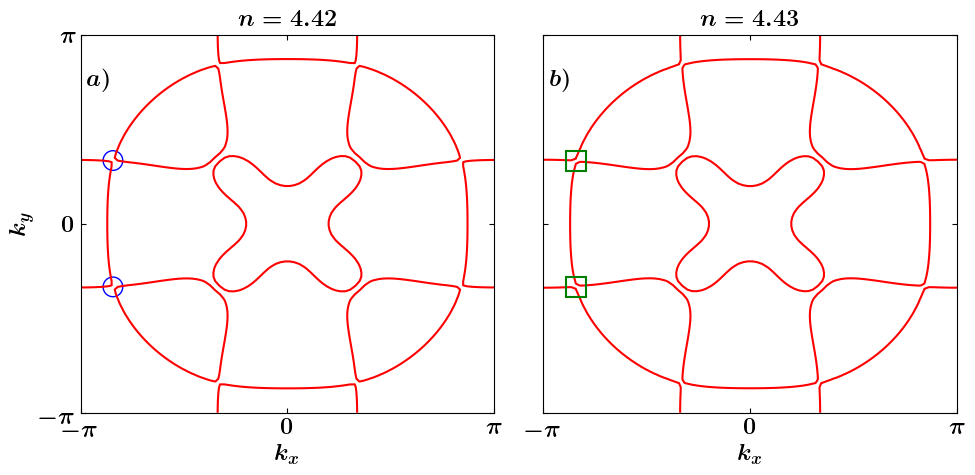

In [11]:
fig,ax = plt.subplots(1, 2, figsize=(10,5))

plt.sca(ax[0])
mus = [0]
cp0 = ax[0].contour(kX, kY, drive[7][:,:,0,0],mus,colors='red')
cp1 = ax[0].contour(kX, kY, drive[7][:,:,0,1],mus, colors='red')
cp2 = ax[0].contour(kX, kY, drive[7][:,:,0,2],mus, colors='red')
cp3 = ax[0].contour(kX, kY, drive[7][:,:,0,3],mus, colors='red')
cp4 = ax[0].contour(kX, kY, drive[7][:,:,0,4],mus, colors='red')
contours = [cp0, cp1, cp2, cp3, cp4]
ax[0].set_yticks([])
ax[0].set_xticks([-np.pi,0,np.pi],[r'$-\pi$',r'$0$',r'$\pi$'])
ax[0].set_xlabel(r'$\boldsymbol{k_x}$', fontsize=17)
ax[0].set_ylabel(r'$\boldsymbol{k_y}$', fontsize=17)
ax[0].set_title(r'$\boldsymbol{n=4.42}$', fontsize=17)
ax[0].annotate(r'$\boldsymbol{a)}$',xy=(-np.pi+0.1,np.pi-0.85), fontsize=17)
ax[0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[0].set_xticks([-np.pi, 0, np.pi],[r'$\boldsymbol{-\pi}$', r'$\boldsymbol{0}$', r'$\boldsymbol{\pi}$'], fontsize=17)
ax[0].set_yticks([-np.pi, 0, np.pi],[r'$\boldsymbol{-\pi}$', r'$\boldsymbol{0}$', r'$\boldsymbol{\pi}$'], fontsize=17)
ax[0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[0].scatter(-2.65, -1.05, edgecolor='blue', facecolor='none', s=200)
ax[0].scatter(-2.65, 1.05, edgecolor='blue', facecolor='none', s=200)

plt.sca(ax[1])
mus = [0]
cp0 = ax[1].contour(kX, kY, drive[8][:,:,0,0],mus,colors='red')
cp1 = ax[1].contour(kX, kY, drive[8][:,:,0,1],mus, colors='red')
cp2 = ax[1].contour(kX, kY, drive[8][:,:,0,2],mus, colors='red')
cp3 = ax[1].contour(kX, kY, drive[8][:,:,0,3],mus, colors='red')
cp4 = ax[1].contour(kX, kY, drive[8][:,:,0,4],mus, colors='red')
contours = [cp0, cp1, cp2, cp3, cp4]
ax[1].set_yticks([])
ax[1].set_xticks([-np.pi,0,np.pi],[r'$-\pi$',r'$0$',r'$\pi$'])
ax[1].set_xlabel(r'$\boldsymbol{k_x}$', fontsize=17)
ax[1].set_title(r'$\boldsymbol{n=4.43}$', fontsize=17)
ax[1].annotate(r'$\boldsymbol{b)}$',xy=(-np.pi+0.1,np.pi-0.85), fontsize=17)
ax[1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[1].set_xticks([-np.pi, 0, np.pi],[r'$\boldsymbol{-\pi}$', r'$\boldsymbol{0}$', r'$\boldsymbol{\pi}$'], fontsize=17)
ax[1].set_yticks([-np.pi, 0, np.pi],[r'', r'', r''])
ax[1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[1].plot(-2.65, -1.05, 'gs', markersize=15, markerfacecolor='none', markeredgewidth=1.5) 
ax[1].plot(-2.65, 1.05, 'gs', markersize=15, markerfacecolor='none', markeredgewidth=1.5)


plt.tight_layout()
plt.savefig('zoom-lifshitz.pdf', dpi=300)


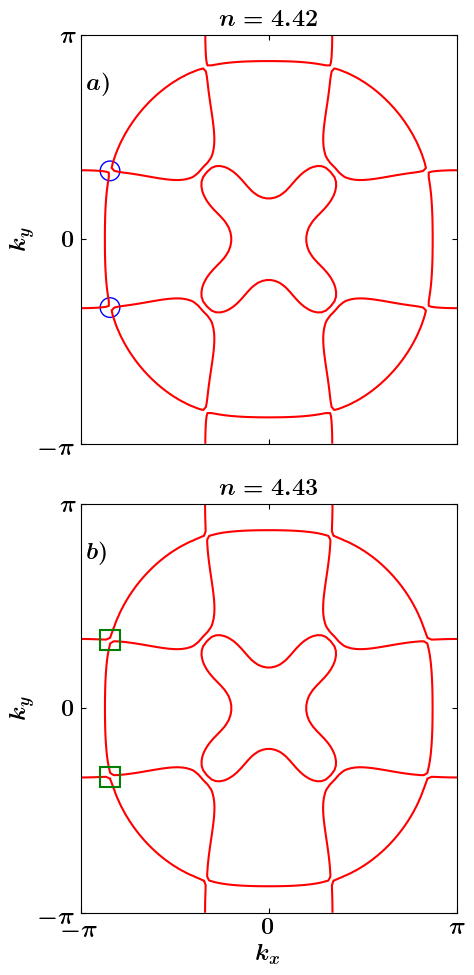

In [10]:
fig,ax = plt.subplots(2, 1, figsize=(5,10))

plt.sca(ax[0])
mus = [0]
cp0 = ax[0].contour(kX, kY, drive[7][:,:,0,0],mus,colors='red')
cp1 = ax[0].contour(kX, kY, drive[7][:,:,0,1],mus, colors='red')
cp2 = ax[0].contour(kX, kY, drive[7][:,:,0,2],mus, colors='red')
cp3 = ax[0].contour(kX, kY, drive[7][:,:,0,3],mus, colors='red')
cp4 = ax[0].contour(kX, kY, drive[7][:,:,0,4],mus, colors='red')
contours = [cp0, cp1, cp2, cp3, cp4]
ax[0].set_yticks([])
ax[0].set_xticks([-np.pi,0,np.pi],[r'$-\pi$',r'$0$',r'$\pi$'])
ax[0].set_ylabel(r'$\boldsymbol{k_y}$', fontsize=17)
ax[0].set_title(r'$\boldsymbol{n=4.42}$', fontsize=17)
ax[0].annotate(r'$\boldsymbol{a)}$',xy=(-np.pi+0.1,np.pi-0.85), fontsize=17)
ax[0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[0].set_xticks([-np.pi, 0, np.pi],[r'', r'', r''])
ax[0].set_yticks([-np.pi, 0, np.pi],[r'$\boldsymbol{-\pi}$', r'$\boldsymbol{0}$', r'$\boldsymbol{\pi}$'], fontsize=17)
ax[0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[0].scatter(-2.65, -1.05, edgecolor='blue', facecolor='none', s=200)
ax[0].scatter(-2.65, 1.05, edgecolor='blue', facecolor='none', s=200)

plt.sca(ax[1])
mus = [0]
cp0 = ax[1].contour(kX, kY, drive[8][:,:,0,0],mus,colors='red')
cp1 = ax[1].contour(kX, kY, drive[8][:,:,0,1],mus, colors='red')
cp2 = ax[1].contour(kX, kY, drive[8][:,:,0,2],mus, colors='red')
cp3 = ax[1].contour(kX, kY, drive[8][:,:,0,3],mus, colors='red')
cp4 = ax[1].contour(kX, kY, drive[8][:,:,0,4],mus, colors='red')
contours = [cp0, cp1, cp2, cp3, cp4]
ax[1].set_yticks([])
ax[1].set_xticks([-np.pi,0,np.pi],[r'$-\pi$',r'$0$',r'$\pi$'])
ax[1].set_xlabel(r'$\boldsymbol{k_x}$', fontsize=17)
ax[1].set_ylabel(r'$\boldsymbol{k_y}$', fontsize=17)
ax[1].set_title(r'$\boldsymbol{n=4.43}$', fontsize=17)
ax[1].annotate(r'$\boldsymbol{b)}$',xy=(-np.pi+0.1,np.pi-0.85), fontsize=17)
ax[1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[1].set_xticks([-np.pi, 0, np.pi],[r'$\boldsymbol{-\pi}$', r'$\boldsymbol{0}$', r'$\boldsymbol{\pi}$'], fontsize=17)
ax[1].set_yticks([-np.pi, 0, np.pi],[r'$\boldsymbol{-\pi}$', r'$\boldsymbol{0}$', r'$\boldsymbol{\pi}$'], fontsize=17)
ax[1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[1].plot(-2.65, -1.05, 'gs', markersize=15, markerfacecolor='none', markeredgewidth=1.5) 
ax[1].plot(-2.65, 1.05, 'gs', markersize=15, markerfacecolor='none', markeredgewidth=1.5)


plt.tight_layout()
plt.savefig('b-zoom-lifshitz.pdf', dpi=300)
